# Deep Learning with PyTorch: A 60-minute Blitz


官方原版： https://github.com/pytorch/tutorials/blob/master/Deep%20Learning%20with%20PyTorch.ipynb


**Note:**

*本教程需要读者掌握基础的[numpy知识](http://cs231n.github.io/python-numpy-tutorial/)*

需要先安装 [PyTorch](https://github.com/pytorch/pytorch) 和 [torchvision](https://github.com/pytorch/vision) 

## 0 序言
### 0.1 何为 PyTorch?

python 优先的计算包，主要针对用户的两类需求：

- 作为numpy的替代品， 提供GPU加速
- 作为深度学习框架， 提供最大的灵活性和速度

### 0.2 目标

- 理解PyTorch的核心数据结构 Tensor 和Variable，以及高阶的神经网络接口(nn).
- 训练一个神经网络进行图片分类（mnist+cifar10）
 




## 1 Tensors

Tensors 就像numpy的ndarrays(多维数组)， 但是PyTorch的Tensor可以使用GPU进行加速。
### 1.1 Tensor的基础操作

In [1]:
from __future__ import print_function
import torch

In [2]:
x = torch.Tensor(5, 3)  # 构建 5x3 矩阵, 未初始化
x


 0.0000e+00  0.0000e+00  0.0000e+00
 0.0000e+00  4.2096e+28  4.5681e-41
-6.5144e-34  4.5681e-41 -6.5123e-34
 4.5681e-41  4.2319e+28  4.5681e-41
 0.0000e+00  0.0000e+00  0.0000e+00
[torch.FloatTensor of size 5x3]

In [3]:
x = torch.rand(5, 3)  # construct a randomly initialized matrix
x


 0.5520  0.2597  0.9464
 0.5238  0.9201  0.5218
 0.6035  0.7167  0.4188
 0.0631  0.8454  0.6235
 0.0021  0.5462  0.5746
[torch.FloatTensor of size 5x3]

In [4]:
print(x.size())
x.size()[1]

torch.Size([5, 3])


3L

*NOTE: `torch.Size` 是一个tuple对象的子类,  所以它支持tuple的所有操作， 比如x.size()[0] *

In [5]:
y = torch.rand(5, 3)

In [6]:
# addition: syntax 1
x + y


 1.2363  0.9091  1.8475
 1.2508  1.6440  1.0354
 1.0828  0.7802  0.7106
 0.1495  1.0999  0.8028
 0.3056  1.3334  1.3437
[torch.FloatTensor of size 5x3]

In [7]:
# addition: syntax 2
torch.add(x, y)


 1.2363  0.9091  1.8475
 1.2508  1.6440  1.0354
 1.0828  0.7802  0.7106
 0.1495  1.0999  0.8028
 0.3056  1.3334  1.3437
[torch.FloatTensor of size 5x3]

In [8]:
print (y)


 0.6843  0.6493  0.9012
 0.7270  0.7239  0.5136
 0.4794  0.0635  0.2918
 0.0864  0.2545  0.1794
 0.3035  0.7873  0.7691
[torch.FloatTensor of size 5x3]



In [9]:
# addition: giving an output tensor 指定加法结果的输出目标为result
result = torch.Tensor(5, 3)
torch.add(x, y, out=result)
result


 1.2363  0.9091  1.8475
 1.2508  1.6440  1.0354
 1.0828  0.7802  0.7106
 0.1495  1.0999  0.8028
 0.3056  1.3334  1.3437
[torch.FloatTensor of size 5x3]

In [10]:
# ！！！！in-place加法！！
y.add(x) # 普通加法, y不变
y.add_(x) # inplace 加法, y变了
print(y)


 1.2363  0.9091  1.8475
 1.2508  1.6440  1.0354
 1.0828  0.7802  0.7106
 0.1495  1.0999  0.8028
 0.3056  1.3334  1.3437
[torch.FloatTensor of size 5x3]



> **Note: ** 函数名后面跟着 **`_`** 的函数会修改tensor 本身 

> 
> 比如：  `x.copy_(y)`, `x.t_()`, 会改变 `x`.
> 
>但是x.t() 返回一个新的 矩阵， 而x的数据不变

In [11]:
# Tensor具有和numpy类似的选取（indexing）操作   （standard numpy-like indexing with all bells and whistles）
x[:,1]


 0.2597
 0.9201
 0.7167
 0.8454
 0.5462
[torch.FloatTensor of size 5]

#### Read later:

更多的Tensor操作， 包括transposing, indexing, slicing, 
mathematical operations, linear algebra, random numbers, etc.
请参考： 
http://pytorch.org/docs/torch.html

### 1.2 与numpy转换
so easy

另外，Tensor和numpy对象共享内存， 所以他们之间的转换很快，而且不会消耗太多的额外资源.

**但这也意味着，其中一个变了，另外一个也会随之改变**
 

#### 1.2.1 torch Tensor -> numpy Array

In [12]:
a = torch.ones(5)
a


 1
 1
 1
 1
 1
[torch.FloatTensor of size 5]

In [13]:
b = a.numpy()
b

array([ 1.,  1.,  1.,  1.,  1.], dtype=float32)

In [14]:
a.add_(1) #以`_` 结尾的函数 是in-place 会修改自身！！
print(a)
print(b) # tensor变了，numpy 的array也变了，因为他们共享内存。


 2
 2
 2
 2
 2
[torch.FloatTensor of size 5]

[ 2.  2.  2.  2.  2.]


#### 1.2.2 numpy Array -> torch Tensor

In [15]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b) #  array变了，tensor也变了，因为他们共享内存。

[ 2.  2.  2.  2.  2.]

 2
 2
 2
 2
 2
[torch.DoubleTensor of size 5]



除了`charTensor`， 大多数基于CPU的Tensor都支持和Numpy的Array转换
 
### 1.3 GPU: CUDA Tensors
Tensor可以通过`.cuda` 函数转为GPU的Tensor

In [16]:
# 如果GPU可用的话，就执行下一步
if torch.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    x + y


**Next: 神经网络 与 PyTorch **

PyTorch中神经网络模块的核心是**`autograd`**模块， 先来过一过`autograd`知识
## 2 Autograd: 自动微分（求导？）

在Tensor上的所有操作，autograde都能为他们自动提供微分， autograd采用define-by-run的运行机制（注意和define-and-run的区别），意味着反向传播的过程取决于你怎么定义代码（好抽象），即你每次计算都可以提供一个不一样的操作（不像TensorFlow预先定义好一个图，然后不能改，要运行好几次）
 
### 2.1 Variable
`autograd.Variable`是autograd中的核心类, 
它简单的封装了Tensor，并支持几乎所有Tensor操作（即tensor支持的操作，你基本都能直接用在Variable上, Tensor在被封装为Variable之后， 可以调用它的`.backward`操作实现反向传播，自动计算所有梯度)


In [17]:
from torch.autograd import Variable
import torch

In [18]:
x = Variable(torch.ones(2, 2), requires_grad = True)
x

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [19]:
y = x.mean()
y

Variable containing:
 1
[torch.FloatTensor of size 1]

In [20]:
y.backward()

In [21]:
x.grad # y = x.mean-> y = 0.25 * (x[0][0] + x[0][1] + x[1][0] + x[1][1]) 

Variable containing:
 0.2500  0.2500
 0.2500  0.2500
[torch.FloatTensor of size 2x2]

![Variable](https://raw.githubusercontent.com/pytorch/tutorials/master/images/Variable.png)
通过`.data` 属性，可以访问Variable所包含的Tensor，`.grad` 可以访问对应的梯度(也是个Variable,而不是Tensor)，注意：.grad 和.data的形状一样, 并且.grad是**累加的(accumulated)**, 意味着每一次运行反向传播,梯度都会加上之前的梯度, 所以运行zero_grad很有必要.

In [22]:
x.data


 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [23]:
y.backward()
x.grad

Variable containing:
 0.5000  0.5000
 0.5000  0.5000
[torch.FloatTensor of size 2x2]

In [24]:
y.backward()
x.grad

Variable containing:
 0.7500  0.7500
 0.7500  0.7500
[torch.FloatTensor of size 2x2]

In [25]:
x.grad.data.zero_()


 0  0
 0  0
[torch.FloatTensor of size 2x2]

In [26]:
y.backward()
x.grad

Variable containing:
 0.2500  0.2500
 0.2500  0.2500
[torch.FloatTensor of size 2x2]

### 2.2 动态图的实现原理

autograd中的另一个比较重要的类是Function, 这个类在你实现具有自动求导功能的函数时很有用(注:在实际使用中尽量用nn.module替代)

`Variable` 和 `Function` 彼此相互联系, 建立起无环图, 记住计算历史(对应到图,就是每个节点都会记住哪个节点,或者哪条边指向`自己`)
这些信息保存在`.creator`属性中, 它指向一个`Function`对象, 这个Function对象的输出是这个Variable自己(由用户创建的Variable的creator 是None 比如      `assert Variable(Tensor(3,4)).creator is None`.

注: 关于计算图和方向传播的相关知识,极力推荐: http://colah.github.io/posts/2015-08-Backprop/

如果 Variable是一个标量(只包含一个数,而非向量之类的), 你在反向传播时候可以不指定参数,默认是1.否则你必须指定一个梯度,这个梯度和Variable具有相同的形状.

$$
\frac{d z}{d x} = \frac{d z}{d y}    \frac{d y}{d x}  
$$ 
假设这个Variable是y, 那么反向传播要求的是dz/dx, .backward要传进来的参数就是dz/dy

In [27]:
x = Variable(torch.ones(2,2), requires_grad = True)
y = x + 2
y

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]

In [28]:
y.creator
# y was created as a result of an operation, 
# so it has a creator

In [29]:
y.creator.previous_functions # 第二个为什么是0? 代表着是函数的第一个输出. 为什么没有2, 因为2 不是Variable

((Variable containing:
   1  1
   1  1
  [torch.FloatTensor of size 2x2], 0),)

In [30]:
z = y * y * 3
z

Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]

In [31]:
z.creator.previous_functions[0][0]

In [32]:
out = z.mean()
out

Variable containing:
 27
[torch.FloatTensor of size 1]

In [33]:
# let's backprop now
out.backward()

# out.backward() 和 out.backward(torch.Tensor([1.0])) 等价

In [34]:
# 打印梯度: d(out)/dx
x.grad

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]

矩阵大小都是`4.5`. 显而易见, 在纸上稍微 写一下就知道了
假设 `out` *Variable* 是"$o$".  
则有
$$o = \frac{1}{4}\sum_i z_i$$, 
$$z_i = 3(x_i+2)^2$$ and 
$$z_i\bigr\rvert_{x_i=1} = 27$$. 
Therefore, $$\frac{\partial o}{\partial x_i} = \frac{3}{2}(x_i+2)$$,
hence $$\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=1} = \frac{9}{2} = 4.5$$.

> **有了AutoGrad可以做很多疯狂的事情:**

In [35]:
x = torch.randn(3)
x = Variable(x, requires_grad = True)

In [36]:
y = x * 2
while y.data.norm() < 1000:
    y = y * 2

In [37]:
y

Variable containing:
-1103.9160
 -307.9434
-1322.5341
[torch.FloatTensor of size 3]

In [38]:
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)

In [39]:
x.grad

Variable containing:
  102.4000
 1024.0000
    0.1024
[torch.FloatTensor of size 3]

##### Read Later:
>更多关于 `Variable` 和 `Function` 的文档: [pytorch.org/docs/autograd.html](http://pytorch.org/docs/autograd.html)



## 3. 神经网络
`torch.nn` 包用来创建神经网络.

`nn` 构建于 `autograd` 之上,来定义和运行神经网络. 这个`nn` 和lua torch的`nn` 接口相似, 但是实现几乎完全不一样.

nn.Module可以近似为一个网络(?), 包含很多layers, 调用他的forward(input), 可以返回前向传播的结果output
 

来用LeNet + Mnist练练手吧:

这是一个基础的前向传播(feed-forward)的网络: 接收输入,并通过一层一层的传递到最后,给出输出.

流程如下(大多数的神经网络训练流程都是这样):

- 定义网络结构和参数
- 在不同的数据中迭代
    - 数据预处理,并输入到网络中
    - 计算loss(output和目标距离的偏差)
    - 反向传播梯度(误差)
    - 更新网络参数(使用最基础的SGD `weight = weight + learning_rate * gradient`)
 

### 3.1 定义网络:

In [44]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5) # 1通道:因为是黑白图片, 6输出channels,  5x5 的卷积核
        self.conv2 = nn.Conv2d(6, 16, 5) #６通道（因为上面的输出是６通道的）
        self.fc1   = nn.Linear(16*5*5, 120) # 仿射层，　其实就是: y = Wx + b
        self.fc2   = nn.Linear(120, 84)# 同上
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2)) # Max pooling over a (2, 2) window　，也可以直接写成２，如下
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) # If the size is a square you can only specify a single number
        x = x.view(-1, self.num_flat_features(x))
        ###x = x.view(x.size()[0], -1) # 用这个应该也行,
#         if x.sum()>100: return x 
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
#        if x[0]>0 : return 1
        
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:] # ｘ的大小是Ｎ*H*W*C N 是batch_size, 我们要的是features_size,也就是一张图片?的所有像素
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

net = Net()

#----------------------------------------------------------------#
# 其实我更喜欢这种写法:
class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.main = nn.Sequential(
            # input is (nc) x 64 x 64
            nn.Conv2d(2, 2, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            #......
            #......
            #......
            nn.Conv2d(3 * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )
    def forward(self, input):
        return self.main(input)
    
# 或者更加简化:
my_net = nn.Sequential(
            # input is (nc) x 64 x 64
            nn.Conv2d(1, 2, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            #......
            #......
            #......
            nn.Conv2d(3 * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )
print(net)
print(my_net)

Net (
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)
Sequential (
  (0): Conv2d(1, 2, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (1): LeakyReLU (0.2, inplace)
  (2): Conv2d(24, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (3): Sigmoid ()
)


在nn.module的子类中定义了forward函数, `backward` 函数会自动被实现(利用`autograd`)

在`forward` 函数中你可以使用任何的Tensor支持的函数, 还可以使用if,for循环,print,log等等. 标准python是怎么写的, 你就可以怎么写的.


可学习的参数通过`net.parameters()`返回

In [45]:
params = list(net.parameters())
print(len(params))
print(params[0].size()) # conv1's .weight

10
torch.Size([6, 1, 5, 5])


**记住!!!: forward的输入和输出都是 `autograd.Variable`, 因为只有Variable才有自动求导功能,Tensor是没有的**

In [46]:
input = Variable(torch.randn(1, 1, 32, 32))
out = net(input)
out

Variable containing:
-0.0201  0.0263 -0.0356 -0.0038 -0.0712  0.0502 -0.0519 -0.1057  0.0980 -0.0247
[torch.FloatTensor of size 1x10]

In [47]:
net.zero_grad() # 所有参数的梯度清零
out.backward(torch.randn(1, 10)) # 反向传播
#out.backward(torch.randn(1, 10)) #如果不清零,再次反向传播会如何? 梯度叠加 (把randn改成one可以更明显的看到效果)

> #### NOTE: `torch.nn` 只支持 mini-batches
不支持一次只输入一个样本, 一次必须是一个batch. 但如果你一定要输入一个样本的话,用 `input.unsqueeze(0)` .(伪装成只有一个样本的batch)
 
比如 `nn.Conv2d` 输入必须是一个 4D Tensor , 形如: `nSamples x nChannels x Height x Width`. 可以把nsample设为1, 但是形状不能是`nChannels x Height x Width`


*** 复习一下: ***

* `torch.Tensor` - 高维数组  
* `autograd.Variable` - **封装Tensor,并记住生成这个Tensor的操作历史 **和`Tensor`有相同的API,,但是多了一些操作,比如`backward()`.  Variable 还比Tensor多了一个`.grad`属性, 包含梯度信息----也是一个Variable.
* `nn.Module` - 神经网络模块. **封装了参数, 很方便**, 可以便捷的在GPU,CPU,硬盘(序列化)之间移动. 
* `nn.Parameter` - (好像并没讲)?一种特殊的Variable ** 当你为nn.Module对象添加一个属性的时候, 会自动注册它为Parameter**, 就像上面的self.conv1=...
* `autograd.Function` - **实现了前向传播和反向传播的函数**.
每个Variable的操作都会生成至少一个`Function`节点(computation Graph的相关知识), 这个节点记录了调用的函数,和生成的Variable, 从而记录了Variable的生成历史.
(Every `Variable` operation, creates at least a single `Function` node, that connects to functions that created a `Variable` and **encodes its history**.)

** 我们已经涉及了:**
- 定义网络 
- 输入数据和调用backward

** 还有:**
- 计算损失
- 更新参数

### 损失函数
损失函数的定义: A loss function takes the (output, target) pair of inputs, and computes a value that estimates how far away the output is from the target.

nn中常用的损失函数: [several different loss functions under the nn package](http://pytorch.org/docs/nn.html#loss-functions).

最简单的loss: `nn.MSELoss` 计算均方误差



In [92]:
output = net(input)
target = Variable(torch.range(1, 10))  # a dummy target, for example
criterion = nn.MSELoss()
loss = criterion(output, target)
loss

Variable containing:
 38.2676
[torch.FloatTensor of size 1]

现在如果对 `loss` 进行反向传播的溯源(使用它的`.creator` 属性),你会看到它的计算图看起来像这样:

```
input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d  
      -> view -> linear -> relu -> linear -> relu -> linear 
      -> MSELoss
      -> loss
```

所以,当我们调用`loss.backward()`, 这个图动态生成, 自动微分,图中参数(Parameter)会自动计算他们的导数,并与当前的导数相加(所以zero_grad很有必要)
       
      

In [93]:
# For illustration, let us follow a few steps backward
print(loss.creator) # MSELoss
print(loss.creator.previous_functions[0][0]) # Linear
print(loss.creator.previous_functions[0][0].previous_functions[0][0]) # ReLU/Threshold

In [94]:
# 运行.backward, 来看看调用之前和调用之后的grad
# now we shall call loss.backward(), and have a look at conv1's bias gradients before and after the backward.
net.zero_grad() # zeroes the gradient buffers of all parameters
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)
loss.backward()
print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
Variable containing:
 0
 0
 0
 0
 0
 0
[torch.FloatTensor of size 6]

conv1.bias.grad after backward
Variable containing:
1.00000e-02 *
  7.7659
  3.1428
 -0.1714
  3.5934
 -0.2407
 -6.1612
[torch.FloatTensor of size 6]



好了 ,现在我们看完了损失函数
##### Read Later:

> `nn` 包中包含大量神经网络中会用到的函数和工具 详细文档见 http://pytorch.org/docs/nn.html


**现在只剩下:**
- 更新网络的权重和参数

### 3.3 优化器
最简单的梯度下降法: 随机梯度下降(SGD):
> `weight = weight - learning_rate * gradient`

很容易实现

```python
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)# inplace
```

torch.optim 中包含着许多常用的优化方法, 比如RMSProp,Adam等等, 非常易于使用. 而且参照着他们的代码, 实现自己的优化方法也是相当的简单. 

In [95]:
import torch.optim as optim
# create your optimizer
optimizer = optim.SGD(net.parameters(), lr = 0.01)

# in your training loop:
optimizer.zero_grad() # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step() # Does the update

O了

### 3.4 数据加载与预处理
通常来说, 当你要处理图片, 文本,语音甚至视频数据时候, 你必须使用标准的Python工具来加载数据,并转为numpy 数组, 然后再转为torch.Tensor
 

- For images, Pillow, OpenCV很有用 
- For audio,  scipy and librosa  
- For text, either raw Python or Cython based loading, or NLTK and SpaCy are useful.

当然最好用的还是torch提供的vison包,叫做`torchvision`, 实现了常用的图像数据加载功能 比如Imagenet,CIFAR10,MNIST等等, 以及常用的数据转换操作, 这位数据加载带来了极大的方便, 并可避免撰写重复代码.
 
来看看CIFAR10, 它有10个类别: 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'.
 图片大小:  3x32x32, i.e. 3-通道彩色 32x32分辨率


## 4 练习:训练图片分类器

步骤如下: 


1. 使用torchvision加载并预处理CIFAR10
1. 定义网络
1. 定义损失函数
1. 训练网络(+ 更新网络参数)
1. 测试网络
 

### 4.1 加载和预处理CIFAR10
so easy

In [42]:
import torchvision
import torchvision.transforms as transforms

In [43]:

# torchvision dataset 的输出默认都是 PILImage: range [0, 1].
# 通过transform 来把他们转成[-1,1]

transform=transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                             ])
trainset = torchvision.datasets.CIFAR10(root='/home/cy/data/', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, 
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='/home/cy/data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, 
                                          shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


*来看几张图片*

In [44]:
# functions to show an image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))

horse   car horse truck


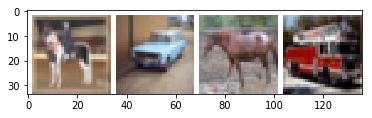

In [45]:
# show some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s'%classes[labels[j]] for j in range(4)))

### 4.2 定义CNN

**Exercise:** 直接拷贝上面的LeNet+Mnist网络,然后修改第一个参数为3通道 (因为mnist是黑白, 而cifar是32)

提示: You only have to change the first layer, change the number 1 to be 3.


```
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
```

**Solution:**

In [46]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool  = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1   = nn.Linear(16*5*5, 120)
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

### 4.3 定义损失函数和优化器(loss和optimizer)

In [48]:
from torch import optim
criterion = nn.CrossEntropyLoss() # use a Classification Cross-Entropy loss 交叉熵损失函数
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 4.4 训练网络

写一个for循环, 不断地
- 输入数据
- 计算损失函数
- 更新参数


In [102]:
for epoch in range(2): # loop over the dataset multiple times 
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):#(当所有的数据都被输入了一遍的时候,循环就会结束,所以需要上面的for epoch in)
        # get the inputs
        inputs, labels = data
        
        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()        
        optimizer.step()
        
        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999: # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 2.123
[1,  4000] loss: 1.805
[1,  6000] loss: 1.666
[1,  8000] loss: 1.587
[1, 10000] loss: 1.520
[1, 12000] loss: 1.480
[2,  2000] loss: 1.392
[2,  4000] loss: 1.360
[2,  6000] loss: 1.348
[2,  8000] loss: 1.347
[2, 10000] loss: 1.278
[2, 12000] loss: 1.276
Finished Training


我们训练了2个epoch(也就是每张图片都输入训练了两次)

可以看看网络有没有效果(测试的图片输入到网络中, 计算它的label, 然后和实际的label进行比较)

先来看看测试集中的一张图片.

GroundTruth:    cat  ship  ship plane


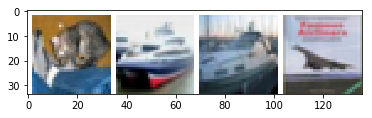

In [103]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s'%classes[labels[j]] for j in range(4)))

计算label

In [104]:
# 计算图片在每个类别上的分数(能量?)
outputs = net(Variable(images))

# the outputs are energies for the 10 classes. 
# Higher the energy for a class, the more the network 
# thinks that the image is of the particular class

# 得分最高的那个类
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s'% classes[predicted[j][0]] for j in range(4)))

Predicted:    cat   car plane plane


还行,至少比随机预测好, 接下来看看在这个测试集的准确率

In [105]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


远比随机猜测(准确率10%)好,说明网络学到了点东西 
 

In [106]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1

In [107]:
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 67 %
Accuracy of   car : 67 %
Accuracy of  bird : 48 %
Accuracy of   cat : 40 %
Accuracy of  deer : 43 %
Accuracy of   dog : 56 %
Accuracy of  frog : 47 %
Accuracy of horse : 56 %
Accuracy of  ship : 53 %
Accuracy of truck : 59 %


下一步:
如何在GPU上跑?

#### 4.5 Training on the GPU
就像我们之前把Tensor从CPU转到GPU一样, 模型也可以很简单的从CPU转到GPU, 
这会把所有的模型参数和buffer转成CUDA tensor
 

In [ ]:
net.cuda()

如果你觉得在GPU上没有比CPU提速很多, 不要着急, 那是因为这个网络实在太小了
 
**Exercise:** 增加网络的深度和宽度 , 看看提速如何
(第一个 `nn.Conv2d`的第二个参数,第二个 `nn.Conv2d`的第一个参数, 需要一样(you know Why)  


#### Goals achieved:

- 理解PyTorch的核心数据结构 Tensor 和Variable， 以及高阶的神经网络接口
- 训练一个神经网络进行图片分类（mnist+cifar10）

### 5 更多show time
#### 5.1 model

In [ ]:
import torchvision.models as models
alexnet = models.alexnet(pretrained=True)  #已经根据论文定义好了模型， 并且有训练好的参数
#可以很方便的进行Finetune和特征提取

#### 5.2 ImageFolder


ImageFolder
假设图片的文件夹如下所式 :
```
root/good/xxx.png
root/good/xxy.png
root/good/xxz.png

root/bad/123.png
root/bad/nsdf3.png
root/bad/asd932_.png
```

通过如下代码可加载：


------

```python
val_dataset = MyImageFolder('/root',
                transform=transforms.Compose([transforms.Scale(opt.image_size),
                                             # transforms.Lambda(lambda image:image.rotate(random.randint(0,359))),
                                              transforms.ToTensor(),
                                              transforms.Normalize([0.5]*3,[0.5]*3)
                                             ]), loader=my_loader)

val_dataloader=t.utils.data.DataLoader(val_dataset,opt.batch_size,True,num_workers=opt.workers, collate_fn=my_collate)
```
其中my_loader 用来加载指定路径的图片到内存
my_collate 用来对dataset加载的数据进行检查
transforms 包含两大类的操作：
1. PIL的Image对象的操作
2. Torch 的Tensor对象的操作

还可以利用transforms.Lambda 传入任意的函数进行操作


比如要在传入的图片中进行随机旋转（每次）
```python
val_dataset = MyImageFolder('/root',
                transform=transforms.Compose([transforms.Scale(opt.image_size),
                                              transforms.Lambda(lambda image:image.rotate(random.randint(0,359))),
                                              transforms.ToTensor(),
                                              transforms.Normalize([0.5]*3,[0.5]*3)
                                             ]), loader=my_loader)

val_dataloader=t.utils.data.DataLoader(val_dataset,opt.batch_size,True,num_workers=opt.workers, collate_fn=my_collate)
```

-----




### 如何finetune
1. 如何加载和保存模型
1. 如何给不同的网络层设置不同的学习率
2. 如何冻结某些网络层的学习率
3. 如何从某一层中提取feature

### 50行训练GAN

## 后续学习?

- [训练网络来打游戏(强化学习)](https://goo.gl/uGOksc)
- [在IMAGENET上训练ResNet](https://github.com/pytorch/examples/tree/master/imagenet)
- [DCGAN](https://github.com/pytorch/examples/tree/master/dcgan)
- [LSTM+language model](https://github.com/pytorch/examples/tree/master/word_language_model)
- [更多官方example](https://github.com/pytorch/examples)
- [更多 tutorials](https://github.com/pytorch/tutorials)
- [论坛](https://discuss.pytorch.org/)
- [ Slack](http://pytorch.slack.com/messages/beginner/)